<a href="https://colab.research.google.com/github/Thebtiboutheina/Flight-Price-Prediction/blob/main/Parkinson's_Disease_Voice_Recordings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"boutheinathebti","key":"615b794f6af36d5f7fef8e10089c9a3a"}'}

In [10]:
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:

!kaggle datasets download -d gargmanas/parkinsonsdataset

  0% 0.00/15.5k [00:00<?, ?B/s]
100% 15.5k/15.5k [00:00<00:00, 39.4MB/s]


In [12]:
!unzip \*.zip

Archive:  parkinsonsdataset.zip
  inflating: parkinsons.csv          
  inflating: parkinsons.names        


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing

In [14]:

data = pd.read_csv('parkinsons.csv', usecols=lambda col: col!='Unnamed: 0')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [15]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# EDA

In [13]:
# Display the first few rows of the dataframe
print(data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [14]:
# Get the basic info about dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

The output of the info() method shows that the dataset has 195 entries (rows) and 24 columns.

All columns are non-null, which means there are no missing values.

## visualize the class distribution

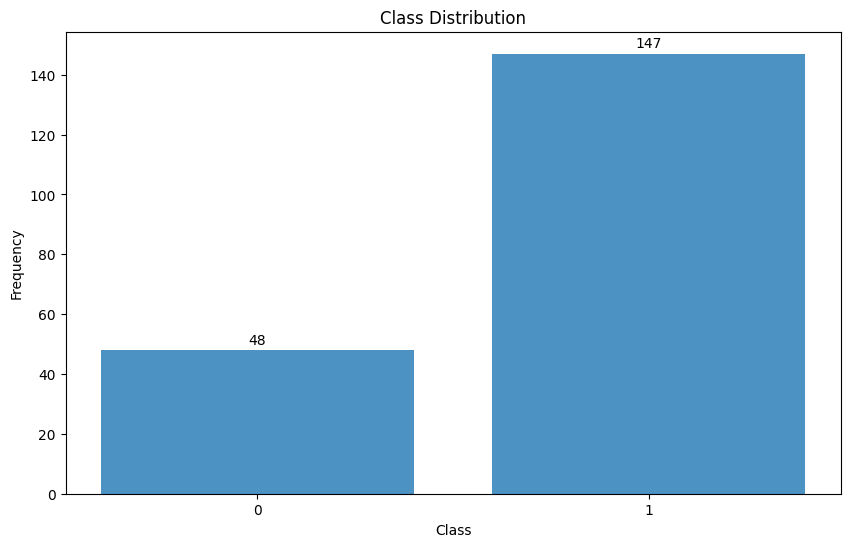

In [15]:
# Create a bar plot of the class distribution
class_counts = data['status'].value_counts()
plt.figure(figsize=(10,6))
bars = plt.bar(class_counts.index, class_counts.values, alpha=0.8)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks([0,1])
# Adding the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()


The output indicates that out of 195 samples, 147 samples are from class 1 and 48 samples are from class 0. This shows that the dataset is imbalanced.

## Correlation matrix

<ipython-input-16-12d2c08e2948>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


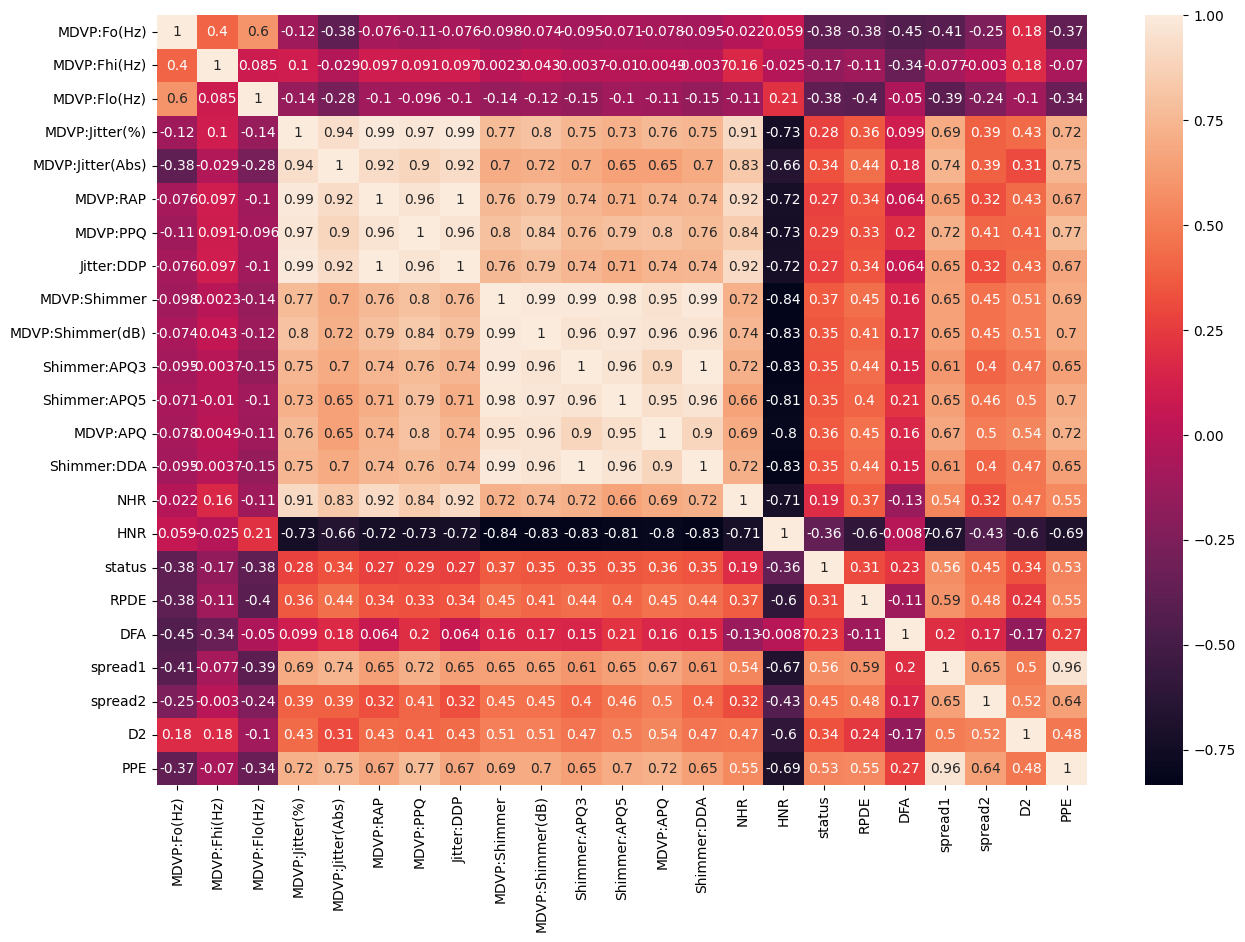

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [18]:
import numpy as np

# Assuming that `df_corr` is your correlation dataframe
threshold = 0.9
corr_matrix = corr_matrix.abs()  # get absolute value of correlations

# Get pairs of highly correlated features
highly_correlated_pairs = [(col, row) for col in corr_matrix.columns for row in corr_matrix.index if (corr_matrix[col][row] > threshold) & (col != row)]

# Get unique features in these pairs
highly_correlated_features = np.unique([feature for pair in highly_correlated_pairs for feature in pair])

print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(pair)

print("\nHighly correlated features:")
for feature in highly_correlated_features:
    print(feature)

Highly correlated pairs:
('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)')
('MDVP:Jitter(%)', 'MDVP:RAP')
('MDVP:Jitter(%)', 'MDVP:PPQ')
('MDVP:Jitter(%)', 'Jitter:DDP')
('MDVP:Jitter(%)', 'NHR')
('MDVP:Jitter(Abs)', 'MDVP:Jitter(%)')
('MDVP:Jitter(Abs)', 'MDVP:RAP')
('MDVP:Jitter(Abs)', 'Jitter:DDP')
('MDVP:RAP', 'MDVP:Jitter(%)')
('MDVP:RAP', 'MDVP:Jitter(Abs)')
('MDVP:RAP', 'MDVP:PPQ')
('MDVP:RAP', 'Jitter:DDP')
('MDVP:RAP', 'NHR')
('MDVP:PPQ', 'MDVP:Jitter(%)')
('MDVP:PPQ', 'MDVP:RAP')
('MDVP:PPQ', 'Jitter:DDP')
('Jitter:DDP', 'MDVP:Jitter(%)')
('Jitter:DDP', 'MDVP:Jitter(Abs)')
('Jitter:DDP', 'MDVP:RAP')
('Jitter:DDP', 'MDVP:PPQ')
('Jitter:DDP', 'NHR')
('MDVP:Shimmer', 'MDVP:Shimmer(dB)')
('MDVP:Shimmer', 'Shimmer:APQ3')
('MDVP:Shimmer', 'Shimmer:APQ5')
('MDVP:Shimmer', 'MDVP:APQ')
('MDVP:Shimmer', 'Shimmer:DDA')
('MDVP:Shimmer(dB)', 'MDVP:Shimmer')
('MDVP:Shimmer(dB)', 'Shimmer:APQ3')
('MDVP:Shimmer(dB)', 'Shimmer:APQ5')
('MDVP:Shimmer(dB)', 'MDVP:APQ')
('MDVP:Shimmer(dB)', 'Shimmer:DDA')
(

**Observation**


*   MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP are strongly correlated with each other, as they have correlations very close to 1. This indicates that they share a lot of common information
*   The target variable status has a high positive correlation with spread1 and PPE. It also has a moderate positive correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, RPDE, spread2. These features might be good predictors for the status.
* The target variable status has a high negative correlation with MDVP:Fo(Hz), MDVP:Flo(Hz), HNR. These features might also be good predictors for the status. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are strongly correlated with each other, as they have correlations very close to 1.
* spread1 and PPE are highly correlated



## Detect outliers

In [19]:
# calculate IQR for each column in the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# only keep rows in the dataframe that have at least one outlier
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(outliers)


               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968   
17   phon_R01_S04_6      168.778       232.181        75.603         0.00718   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

<ipython-input-19-43254a2c2505>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-19-43254a2c2505>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-19-43254a2c2505>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


# Preprocessing

## data balancing

In [16]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
X = data.drop(['status', 'name'], axis=1)
y = data['status']

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assume you have X and y dataframes for features and target respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# Now X_train_res and y_train_res are the training set balanced by SMOTE.



In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_res)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


In [21]:
cumulative_variance_ratio

array([0.62656268, 0.74899966, 0.80928908, 0.8627384 , 0.894046  ,
       0.92226167, 0.94798906, 0.96464339, 0.97504169, 0.98371833,
       0.98934974, 0.99365816, 0.99656173, 0.99766575, 0.99842761,
       0.99901742, 0.99951641, 0.9998522 , 0.99996815, 0.99999998,
       1.        , 1.        ])

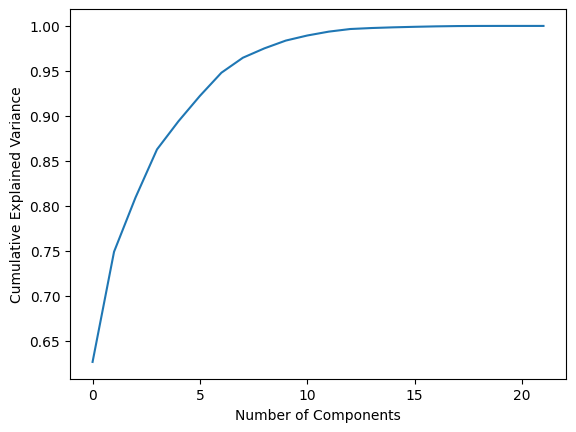

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [23]:


# Create a PCA instance: pca
pca = PCA(n_components=7)  # Change this to choose the number of components

# Fit and transform the data
principalComponents = pca.fit_transform(X_train_res)

# Convert to dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component ' + str(i) for i in range(1, 8)])

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


[0.62656268 0.12243698 0.06028942 0.05344931 0.0313076  0.02821567
 0.0257274 ]


In [25]:
# Apply PCA transformation to the training data
X_train_pca = pca.transform(X_train_res)
X_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Apply PCA transformation to the test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])


In [28]:
#data distribution after SMOTE
print(pd.Series(y_train_res).value_counts())

0    109
1    109
Name: status, dtype: int64


# modeling

In [38]:
!pip install xgboost
!pip uninstall shapash -y
!pip install shapash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: shapash 2.3.4
Uninstalling shapash-2.3.4:
  Successfully uninstalled shapash-2.3.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached shapash-2.3.4-py2.py3-none-any.whl (652 kB)


In [44]:

import shapash
from shapash.explainer.smart_explainer import SmartExplainer

In [41]:
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier

# Instantiate an XGBoost classifier
xgb = XGBClassifier()

# Fit the model on the balanced training data
xgb.fit(X_train_pca, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:

# Make predictions on your test set
y_preds = xgb.predict(X_test_pca)

In [43]:

features_dict = {'MDVP:Fo(Hz)':'MDVP Fo', 'MDVP:Fhi(Hz)':'MDVP Fhi', 'MDVP:Flo(Hz)':'MDVP Flo',
                 'MDVP:Jitter(%)':'MDVP Jitter', 'MDVP:Jitter(Abs)':'MDVP Jitter Abs',
                 'MDVP:RAP':'MDVP RAP', 'MDVP:PPQ':'MDVP PPQ', 'Jitter:DDP':'Jitter DDP',
                 'MDVP:Shimmer':'MDVP Shimmer', 'MDVP:Shimmer(dB)':'MDVP Shimmer dB',
                 'Shimmer:APQ3':'Shimmer APQ3', 'Shimmer:APQ5':'Shimmer APQ5', 'MDVP:APQ':'MDVP APQ',
                 'Shimmer:DDA':'Shimmer DDA', 'NHR':'NHR', 'HNR':'HNR', 'RPDE':'RPDE', 'DFA':'DFA',
                 'spread1':'spread1', 'spread2':'spread2', 'D2':'D2', 'PPE':'PPE'}

In [45]:
xpl = SmartExplainer(features_dict=features_dict, model=xgb)



In [107]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0])

In [46]:
y_preds_df = pd.DataFrame(y_preds, columns=['status'])


In [47]:
# Then you can pass y_preds_df to the compile method
xpl.compile(
    x=X_test_pca,
    y_pred=y_preds_df
)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [110]:
summary_df = xpl.to_pandas(max_contrib=3)  # max_contrib specifies the maximum number of features to show
print(summary_df)

    status feature_1   value_1 contribution_1 feature_2   value_2  \
0        1  MDVP RAP -0.133725       1.623354   spread1  0.428796   
1        1   spread1  0.608649       1.905384   MDVP Fo -0.419639   
2        1   spread1  2.324856       1.863624  MDVP RAP  0.284318   
3        1   MDVP Fo -0.095919       2.957241        D2  0.463399   
4        1   MDVP Fo -0.433843       1.583438  MDVP RAP  1.315255   
5        1   spread1  1.140107       1.885812  MDVP RAP  0.397686   
6        1   spread1   1.63163       1.899626  MDVP RAP  0.433113   
7        1   MDVP Fo -0.463466       1.930972   spread1  0.701032   
8        1   spread1  1.129806       1.764823  MDVP RAP  0.801558   
9        1  MDVP RAP  0.326831       1.365772   spread2 -0.260365   
10       1  MDVP RAP -0.055785       1.630023   spread1  0.831621   
11       1   MDVP Fo  -0.22755       1.632578  MDVP RAP   0.31266   
12       1   spread1   0.99487       1.831348  MDVP RAP  0.266604   
13       1   spread1  1.004493    

In [48]:
app = xpl.run_app()

<IPython.core.display.Javascript object>

In [49]:
!pip install pyyaml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import yaml

# Define data
data = {
    'Metadata': {
    'author': "Thebti Boutheina",
    'date': "June 24, 2023",
    'data_source': "https://archive.ics.uci.edu/ml/datasets/parkinsons",
    'project': 'Binary classification project',
    'description': 'This is a description of my project.'
}
}


In [51]:
with open('reports/project_info.yml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

In [52]:
!pip install papermill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score


In [60]:
X_train_pca.isna().any()


PC1    False
PC2    False
PC3    False
PC4    False
PC5    False
PC6    False
PC7    False
dtype: bool

In [55]:
xpl.generate_report(
    output_file='reports/report.html',
    project_info_file='reports/project_info.yml',
    x_train=X_train_pca,
    y_train=y_train_res,
    y_test=y_test,
    title_story="Parkinson's Disease Voice Recordings Analysis",
    title_description="""This document is a data science report of the Parkinson's disease voice recordings analysis project".
        It was generated using the Shapash library.""",
    metrics=[{'name': 'Accuracy', 'path': 'sklearn.metrics.accuracy_score'},
             {'name': 'ROC AUC', 'path': 'sklearn.metrics.roc_auc_score'}]
)


Executing:   0%|          | 0/15 [00:00<?, ?cell/s]

PapermillExecutionError: ignored

# Calculate skewness
skewness = X_train_res_orig.skew()

# Print the features with high skewness
print(skewness[abs(skewness) > 0.5])


In [124]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
selector.fit_transform(X_train_res_orig)

# Get the indices of the features that are being kept
features_kept_indices = selector.get_support(indices=True)

# Get the names of the features being kept
features_kept = X_train_res_orig.columns[features_kept_indices]

print(features_kept)


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)',
       'HNR', 'spread1', 'D2'],
      dtype='object')


In [125]:
# Calculate correlations
correlations = X_train_res_orig.corr()

# Get pairs of highly correlated features
pairs = correlations.unstack()
high_corr_pairs = pairs[(abs(pairs) > 0.8) & (abs(pairs) < 1.0)]  # Adjust the threshold as needed

print(high_corr_pairs)


MDVP:Jitter(%)  MDVP:Jitter(Abs)    0.940510
                MDVP:RAP            0.988350
                MDVP:PPQ            0.977271
                Jitter:DDP          0.988351
                MDVP:Shimmer        0.829502
                                      ...   
HNR             MDVP:APQ           -0.811037
                Shimmer:DDA        -0.846564
spread1         PPE                 0.977706
PPE             MDVP:PPQ            0.804059
                spread1             0.977706
Length: 114, dtype: float64
